#Convergence of explicit finite difference formulations demonstrated on derivatives

We consider the infinitely differentiable function:

$$f(x) = \sin(\pi x) + 1 $$ 

which have derivatives ($n\in\mathbb{N}_1$) :

$$f^{(2n-1)}(x) = (-1)^{n+1} \pi^{2n - 1} \cos(\pi x)$$

and

$$f^{(2n)}(x) = (-1)^n \pi^{2n}\sin(\pi x)$$

Below, we plot the function as well as four normalized derivatives, the normalized derivatives of higher order are coincident with those plotted. Note, this is only to fit them on the same plot, for convergence we properly analyze the unnormalized forms.

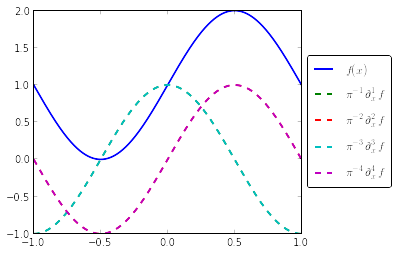

In [1]:
%reload_ext autoreload 
%autoreload 2 # reloads dependent modules before re-execution of code
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1,1000)
f =  np.sin(np.pi*x) + 1
nmax = 4 # maximum derivative desired to be plotted

fig, ax = plt.figure(), plt.subplot(111)

ax.plot(x,f, linewidth = 2, label = '$f(x)$')
ax.hold('on')

for n in range(1,nmax + 1):
    if np.mod(n,2) == 1: # n is odd
        dnf = (-1) ** (n + 1) * np.pi ** (2*n - 1) * np.cos(np.pi * x)
        dnf /= np.pi ** (2*n - 1) # i.e. we plot normalized derivatives

    else: # n is even
        dnf = (-1) ** n * np.pi ** (2*n) * np.sin(np.pi * x)
        dnf /= np.pi ** (2*n) # i.e. we plot normalized derivatives

    ax.plot(x,dnf, linewidth = 2, linestyle = '--', label = r'$\pi^{-%i}\partial_x^{%i} f$' % (n,n) )

ax.hold('off')
frame = ax.get_position() # position of plot center

# shrink frame of the plot to make room for a legend on the right side
ax.set_position([frame.x0, frame.y0, 
                 frame.width * 0.8, frame.height])

# Place legend to the right of the shrunken frame
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fancybox=True, ncol=1)

plt.show()


We can use the script pyfiles/bin/generate_tables_of_finite_difference_schemes_for_a_given_LTE.py to generate tables of explicit finite difference schemes for grids with uniform spacing $\Delta x$ for a chosen order of derivative and a specified maximum LTE, for example, if we desire an LTE (sys.argv[1]) of 1 and want the family of finite difference schemes corresponding to the second derivative 2 (sys.argv[2]), we run from the terminal 

which produces the table

The weights of which are well-known, the labeling F0, C0, B0 indicate 'forward', 'central', and 'backward' differencing (cf. stencil), where the number 0 communicates the degree of asymmetry from those schemes (central always has 0 asymmetry due to its definition). For example, and F0 scheme has a stencil that samples grid points strictly forward of point of interest, an F1 scheme has a stencil that samples one grid point backward and the rest forward (consider stencils greater than 3 for an instance), and so on. If an FN ($N\in\mathbb{N}$) is more aptly named according to a different scheme (e.g. F1 above is a central scheme), the namechange is commited in favor of the corresponding asymmetric labeling FN or BN. Note, the central scheme is actually second order because the first order term fortuitously cancels, this is also well-known.

The weights $\{w\}$ and stencil $\{i\}$ can be used to calculate the derivative according:

$$f^{(n)}(x) = \tfrac{1}{(\Delta x)^n}\sum_i w_i f(x + i\Delta x)$$

For example, selecting one scheme in particular: a fully forward differencing scheme ('F0') at an LTE of order 3. The following demonstrates convergence

In [41]:
from IPython.display import Image

Image(url='http://python.org/images/python-logo.gif')

In [42]:
cd Convergence\ of\ FD\ calculations\ of\ derivatives/pyfiles/

[Errno 2] No such file or directory: 'Convergence of FD calculations of derivatives/pyfiles/'
/home/dsirajud/Work/IPython-notebooks/Convergence of FD calculations of derivatives/pyfiles


In [43]:
from main import *

In [45]:
FD_derivative_one_scheme_periodic(handedness = 'forward', asymmetry = 0, dn = 1, LTE = 3, Nx = 128)

6.5669843086218403e-05

derivative dn = 1: 

slope of a linear fit = 3.01534 

order calculations at each refinement step:
Nx21        error = 0.00590602       ----
Nx42        error = 0.00063718       order = 3.21241
Nx84        error = 7.77385e-05       order = 3.035
Nx168        error = 9.68782e-06       order = 3.00439
Nx336        error = 1.21057e-06       order = 3.00049
Nx672        error = 1.51316e-07       order = 3.00004
Nx1344        error = 1.89145e-08       order = 3
Nx2688        error = 2.36434e-09       order = 2.99998
Nx5376        error = 2.95594e-10       order = 2.99975
Nx10752        error = 3.70683e-11       order = 2.99536


derivative dn = 2: 

slope of a linear fit = 2.80058 

order calculations at each refinement step:
Nx21        error = 0.0542878       ----
Nx42        error = 0.00571043       order = 3.24896
Nx84        error = 0.000526414       order = 3.43933
Nx168        error = 4.70162e-05       order = 3.48497
Nx336        error = 4.1665e-06       order = 3.49625
Nx672       

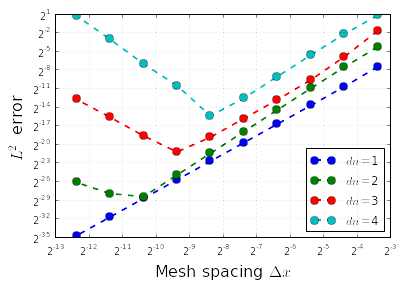

In [46]:
convergence_for_several_derivatives_at_const_LTE(NumGrids = 10, _LTE = 3, _dn_max = 4)